In [1]:
import geopandas as gpd
from shapely.geometry import MultiPolygon

In [2]:
# Load your GeoJSON file
gdf = gpd.read_file('jk.vc.geojson.json')

In [4]:
# Load your GeoJSON file
print(gdf.head())

   AC_NO                 AC_NAME            ST_NAME ST_CODE  \
0      0                      NA  Jammu and Kashmir     U08   
1      0                      NA  Jammu and Kashmir     U08   
2      0                      NA  Jammu and Kashmir     U08   
3      0                      NA  Jammu and Kashmir     U08   
4     45  Srigufwara - Bijbehara  Jammu and Kashmir     U08   

                                            geometry  
0  POLYGON ((74.17505 33.41303, 74.1746 33.41341,...  
1  POLYGON ((74.01999 33.60414, 74.0129 33.61859,...  
2  POLYGON ((74.44374 32.79883, 74.4433 32.79924,...  
3  POLYGON ((74.14682 35.09742, 74.14659 35.09745...  
4  POLYGON ((75.08327 33.75877, 75.08451 33.7595,...  


In [6]:
# Check for invalid geometries
invalid_geometries = gdf[~gdf.is_valid]
print(f"Found {len(invalid_geometries)} invalid geometries.")

Found 8 invalid geometries.


In [7]:
# Attempt to fix invalid geometries using buffer(0)
gdf['geometry'] = gdf.geometry.buffer(0)

In [8]:
# Verify if geometries are now valid
invalid_geometries = gdf[~gdf.is_valid]
print(f"After fixing, found {len(invalid_geometries)} invalid geometries.")


After fixing, found 0 invalid geometries.


In [11]:
# Merge all the polygons into a single polygon using unary_union replacement
state_boundary = gdf.geometry.unary_union

/var/folders/_t/qdwqtlx92895wppq6z1q5gz80000gn/T/ipykernel_12092/1822286919.py:2: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  state_boundary = gdf.geometry.unary_union


In [12]:
# Check and handle the type of the result
if isinstance(state_boundary, MultiPolygon):
    print("The state consists of multiple discontiguous parts.")
else:
    print("Merged State Boundary:", state_boundary)

The state consists of multiple discontiguous parts.


In [13]:
# Optionally, create a new GeoDataFrame
state_gdf = gpd.GeoDataFrame(geometry=[state_boundary], crs=gdf.crs)

Matplotlib is building the font cache; this may take a moment.


<Axes: >

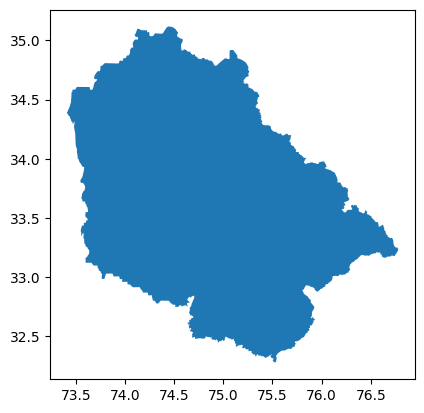

In [15]:
# Plotting the merged boundary
state_gdf.plot()

In [16]:
# Optionally, save the new GeoJSON
state_gdf.to_file("jnk_state_boundary.geo.json", driver='GeoJSON')